In [1]:
%plot -b inline -h 500 -w 1000

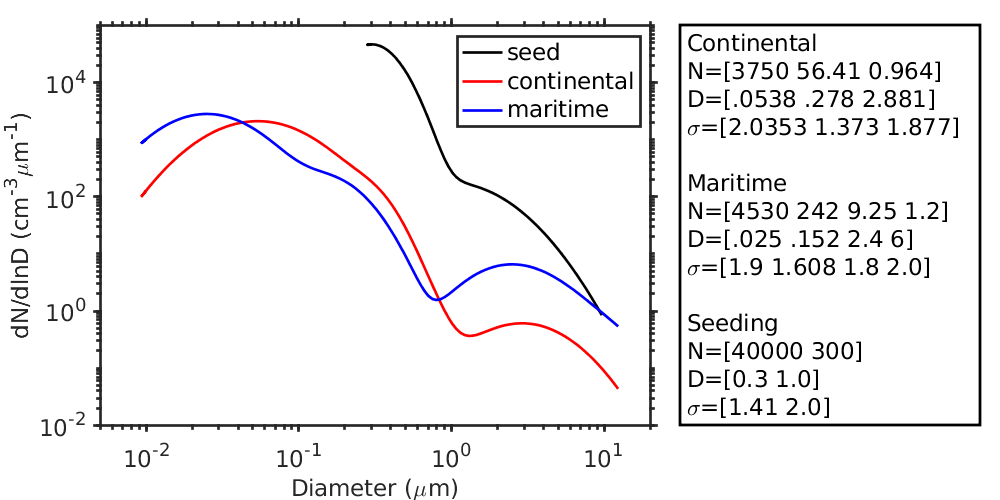

In [4]:
clear;
% The model shows fitting of measurements to lognormal distribution based on Jaenicke (1988)
% Threelog-normal distribution are added in this parameterization
% Parameters and constants
l_color={'k','r','b'};
PK=1.2; %bin factor
ROW=1000; %water density
%ROCCN=2160; %aerosol density % chose to be the same as Istvan's aerosol model 

%parameters of the log normal dist. (see Seinfeld and Pandis, 1998 p. 371 (2006 p.343 ))
N(1:4,1) = [40000 300 0 0]; %QLD seeding
%N(1:3,2) = [40000 6.8 12e-3]%Cooper 1997
N(1:4,2)=[3750 56.41 0.964 0]; %QLD continental
N(1:4,3)=[4530 242 9.25 1.2]; %QLD maritime
%N(1:2,1)=[48 125]';%modified polluted from Jensen & Nugent 2017
%N(1:2,2)=[125 65]';%pristine from JN17
%%----------------------------------
%N(1:3,1)=[133 66.6 3.06]'; %Marine
%%N(1:3,2)=[997 842 0.00071]'; %remote continental
%N(1:3,2)=[3200 2900 0.3]';
%N(1:3,3)=[6650 147 1990]'; %rural
%N(1:3,4)=[99300 1100 36400]'; %urban
%N(1:3,5)=[726 1140 0.178]'; %desert dust
%%----------------------------------
R(1:4,1) = 1e-6*[.15 .5 .6  0];
%R(1:3,2) = 1e-6*[.15 .5 5]%Cooper 1997
R(1:4,2)=1e-6*[0.0538/2 .278/2 2.881/2 0];
R(1:4,3)=1e-6*[0.025/2 .152/2 2.4/2 6/2];
%R(1:2,1)=1e-6*[0.029 0.071]';
%R(1:2,2)=1e-6*[.011 .06]';
%%----------------------------------
%R(1:3,1)=1e-6*[0.0039 0.133 0.29]';
%%R(1:3,2)=1e-6*[0.001 0.0218 6.24]';
%R(1:3,2)=1e-6*[0.01 0.058 0.9]';
%R(1:3,3)=1e-6*[0.00739 0.0269 0.0419]';
%R(1:3,4)=1e-6*[0.00651 0.00714 0.0248]';
%R(1:3,5)=1e-6*[0.001 0.0188 11.8]';
%R(1:3,5)=1e-6*[0.001 0.0188 10.8]';
%%----------------------------------
var(1:4,1)=[1.41 2.0 1.2589 1.1];
%var(1:3,2)=[.2 0.4 .6];var=10.^var %Cooper 1997
var(1:4,2)=[2.0353 1.373 1.877 1.1];
var(1:4,3)=[1.9 1.608 1.8 2.0];
%var(1:2,1)=[1.36 1.57]';
%var(1:2,2)=[1.2 1.7]';
%%----------------------------------
%var(1:3,1)=[0.657 0.210 0.396]';
%%var(1:3,2)=[0.328 0.505 0.277]';
%var(1:3,2)=[0.161 0.217 0.380]';
%var(1:3,3)=[0.225 0.557 0.266]';
%var(1:3,4)=[0.245 0.666 0.337]';
%var(1:3,5)=[0.247 0.770 0.438]';
%var=10.^var
%%----------------------------------
[mx,my]=size(N);
R0(1)=1.5e-7;
R0(2:3)=5.e-9;
%RAER(1)=5e-9; %QLD natural radius of the first aerosol
num_ch(1)=60;
num_ch(2:3)=120; %QLD natural %number of bins % xue choose 45 as the total bins for dry aerosol cover 0.001 to 10.42 um (40 bins) and 10.42 to 33.1 um (5 bins) are reserved for aerosol growth.

%parameters for log-normal distribution
for t_aer=1:my
    %calculation of the bins
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    for j=1:mx
%       mu(j,t_aer)=log(R(j,t_aer))-0.5*log(1+var(j,t_aer)/R(j,t_aer)^2);
%       mu(j,t_aer)=log(R(j,t_aer))-0.5*(log(10^(var(j,t_aer))))^2;
%%%       sig(j,t_aer)=log(1+var(j,t_aer)/R(j,t_aer)^2);
       sig(j,t_aer)=log(var(j,t_aer)); %convert to log(sigma)
       %sig(j,t_aer)=log(10^(var(j,t_aer)));
    end
end
   
for t_aer=1:my
    %calculation of the bins
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    for i=1:num_ch(t_aer)
 %calculation of the contribution of each mode to the distribution
        for j=1:mx
            dNdlogDj(i,t_aer,j)=(N(j,t_aer)/(((2*pi)^0.5)*sig(j,t_aer)))...
                *exp(-((log(ch(i))-log(R(j,t_aer)))^2)/(2*(sig(j,t_aer))^2));
        end
        dNdlogD(i,t_aer)=sum(dNdlogDj(i,t_aer,:));
        NdlogD(i,t_aer)=sum(dNdlogDj(i,t_aer,:))/ch(i);
        if dNdlogD(i,t_aer)<1e-8
            dNdlogD(i,t_aer)=1e-8;
        end
    end
    %total concentration
    Ntot_new(1,t_aer)=dNdlogD(1,t_aer)*(log(ch(1))-log(ch(1)/PK^(1/3))); 
    %we have to assume something on the width of the first bin....
    for i=2:num_ch
       Ntot_new(i,t_aer)=dNdlogD(i,t_aer)*(log(ch(i))-log(ch(i-1)));
    end
end
fig1=figure;
axes1 = axes('Parent',fig1,...
    'Position',[0.1 0.15 0.55 0.8]);
for t_aer=1:3
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    ch_micron=ch*1e6; %converting to micron
    loglog(ch_micron(1:num_ch(t_aer))*2,dNdlogD(1:num_ch(t_aer),t_aer),'-','Color',l_color{t_aer})%,ch_micron(1:length(ch)),dNdlogD(:,2),'*g-')
    hold on
end

set(gcf,'color',[1 1 1]);
xlabel('Diameter (\mum)');
ylabel('dN/dlnD (cm^{-3}\mum^{-1})'); %xue change dN/dlogD to dN/dlnD
%set(gca,'FontSize',14,'FontWeight','bold');
axis([5e-3 20 1e-2 1e5]);
set(gca,'XTick',[0.001 0.01 0.1 1 10 100]);
%set(gca,'YTickLabel',[0.0001 0.001 0.01 0.1 1 10 100 1000 10000 100000]);
set(gca,'TickDir','out');
%legend('seeded PSD','cooper 1997')
legend('seed','continental','maritime')
%legend('modified polluted','pristine')
%legend('marine','remote','rural','urban','desert',1);

annotation(fig1,'textbox',...
    [0.68 0.15 0.3 0.8],...
    'String',{'Continental','N=[3750 56.41 0.964]','D=[.0538 .278 2.881]','\sigma=[2.0353 1.373 1.877]','',...
    'Maritime','N=[4530 242 9.25 1.2]','D=[.025 .152 2.4 6]','\sigma=[1.9 1.608 1.8 2.0]','',...
    'Seeding','N=[40000 300]','D=[0.3 1.0]','\sigma=[1.41 2.0]'},...
    'FitBoxToText','off'); %for QLD background
hold off
set(findall(gcf,'-property','FontSize'),'FontSize',17)
set(findall(gcf,'-property','LineWidth'),'LineWidth',2)

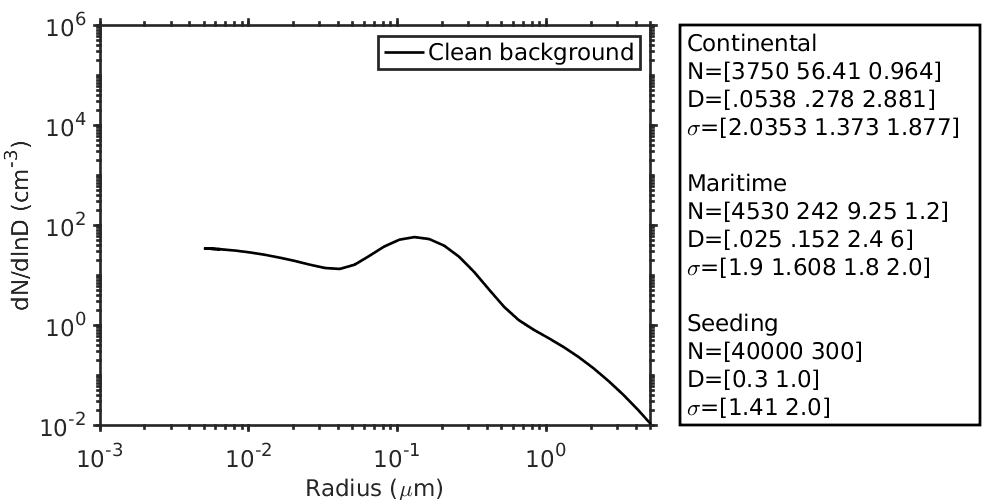

In [30]:
clear;
% The model shows fitting of measurements to lognormal distribution based on Jaenicke (1988)
% Threelog-normal distribution are added in this parameterization
% Parameters and constants
l_color={'k','r','b'};
PK=2; %bin factor
ROW=1000; %water density
RDR_1=1.5625e-6;
ROCCN=1726; %aerosol density % chose to be the same as Istvan's aerosol model 
%M(1)=((4/3)*pi*ROW*RDR_1^3)/(PK^19); %mass of the first aerosol size bin
M=((4/3)*pi*ROW*RDR_1^3)/(PK^23); %need that many to reach 0.001 um size
R0=(3*M/(4*ROCCN*pi))^(1/3); 

%ROCCN=2160; %aerosol density % chose to be the same as Istvan's aerosol model 

%parameters of the log normal dist. (see Seinfeld and Pandis, 1998 p. 371 (2006 p.343 ))
%%----------------------------------
N(1:3,1)=[133 66.6 3.06]'; %Marine
%%N(1:3,2)=[997 842 0.00071]'; %remote continental
%N(1:3,2)=[3200 2900 0.3]';
%N(1:3,3)=[6650 147 1990]'; %rural
%N(1:3,4)=[99300 1100 36400]'; %urban
%N(1:3,5)=[726 1140 0.178]'; %desert dust
%%----------------------------------
%%----------------------------------
R(1:3,1)=1e-6*[0.0039 0.133 0.29]';
%%R(1:3,2)=1e-6*[0.001 0.0218 6.24]';
%R(1:3,2)=1e-6*[0.01 0.058 0.9]';
%R(1:3,3)=1e-6*[0.00739 0.0269 0.0419]';
%R(1:3,4)=1e-6*[0.00651 0.00714 0.0248]';
%R(1:3,5)=1e-6*[0.001 0.0188 11.8]';
%R(1:3,5)=1e-6*[0.001 0.0188 10.8]';
%%----------------------------------
%%----------------------------------
var(1:3,1)=[0.657 0.210 0.396]';
%%var(1:3,2)=[0.328 0.505 0.277]';
%var(1:3,2)=[0.161 0.217 0.380]';
%var(1:3,3)=[0.225 0.557 0.266]';
%var(1:3,4)=[0.245 0.666 0.337]';
%var(1:3,5)=[0.247 0.770 0.438]';
%var=10.^var
%%----------------------------------
[mx,my]=size(N);
%RAER(1)=5e-9; %QLD natural radius of the first aerosol
num_ch(1)=60;
num_ch(2:3)=120; %QLD natural %number of bins % xue choose 45 as the total bins for dry aerosol cover 0.001 to 10.42 um (40 bins) and 10.42 to 33.1 um (5 bins) are reserved for aerosol growth.

%parameters for log-normal distribution
for t_aer=1:my
    %calculation of the bins
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    for j=1:mx
%       mu(j,t_aer)=log(R(j,t_aer))-0.5*log(1+var(j,t_aer)/R(j,t_aer)^2);
%       mu(j,t_aer)=log(R(j,t_aer))-0.5*(log(10^(var(j,t_aer))))^2;
%%%       sig(j,t_aer)=log(1+var(j,t_aer)/R(j,t_aer)^2);
       %sig(j,t_aer)=log(var(j,t_aer)); %convert to log(sigma)
       sig(j,t_aer)=log(10^(var(j,t_aer)));
    end
end
   
for t_aer=1:my
    %calculation of the bins
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    for i=1:num_ch(t_aer)
 %calculation of the contribution of each mode to the distribution
        for j=1:mx
            dNdlogDj(i,t_aer,j)=(N(j,t_aer)/(((2*pi)^0.5)*sig(j,t_aer)))...
                *exp(-((log(ch(i))-log(R(j,t_aer)))^2)/(2*(sig(j,t_aer))^2));
        end
        dNdlogD(i,t_aer)=sum(dNdlogDj(i,t_aer,:));
        NdlogD(i,t_aer)=sum(dNdlogDj(i,t_aer,:))/ch(i);
        if dNdlogD(i,t_aer)<1e-8
            dNdlogD(i,t_aer)=1e-8;
        end
    end
    %total concentration
    Ntot_new(1,t_aer)=dNdlogD(1,t_aer)*(log(ch(1))-log(ch(1)/PK^(1/3))); 
    %we have to assume something on the width of the first bin....
    for i=2:num_ch
       Ntot_new(i,t_aer)=dNdlogD(i,t_aer)*(log(ch(i))-log(ch(i-1)));
    end
end
fig1=figure;
axes1 = axes('Parent',fig1,...
    'Position',[0.1 0.15 0.55 0.8]);
for t_aer=1:my
    ch(1)=R0(t_aer); %aerosol radius
    w(1)=ch(1)*(PK^(1/3)-1);
    for i=2:num_ch(t_aer)
        ch(i)=R0(t_aer)*PK^(i/3-1);
        w(i)=ch(i)-ch(i-1);
    end
    ch_micron=ch*1e6; %converting to micron
    loglog(ch_micron(1:num_ch(t_aer)),dNdlogD(1:num_ch(t_aer),t_aer),'-','Color',l_color{t_aer})%,ch_micron(1:length(ch)),dNdlogD(:,2),'*g-')
    hold on
end

set(gcf,'color',[1 1 1]);
xlabel('Radius (\mum)');
ylabel('dN/dlnD (cm^{-3})'); %xue change dN/dlogD to dN/dlnD
%set(gca,'FontSize',14,'FontWeight','bold');
axis([1e-3 5 1e-2 1e6]);
set(gca,'XTick',[0.001 0.01 0.1 1 10 100]);
%set(gca,'YTickLabel',[0.0001 0.001 0.01 0.1 1 10 100 1000 10000 100000]);
set(gca,'TickDir','out');
%legend('seeded PSD','cooper 1997')
legend('Clean background')
%legend('modified polluted','pristine')
%legend('marine','remote','rural','urban','desert',1);

annotation(fig1,'textbox',...
    [0.68 0.15 0.3 0.8],...
    'String',{'Continental','N=[3750 56.41 0.964]','D=[.0538 .278 2.881]','\sigma=[2.0353 1.373 1.877]','',...
    'Maritime','N=[4530 242 9.25 1.2]','D=[.025 .152 2.4 6]','\sigma=[1.9 1.608 1.8 2.0]','',...
    'Seeding','N=[40000 300]','D=[0.3 1.0]','\sigma=[1.41 2.0]'},...
    'FitBoxToText','off'); %for QLD background
hold off
set(findall(gcf,'-property','FontSize'),'FontSize',17)
set(findall(gcf,'-property','LineWidth'),'LineWidth',2)

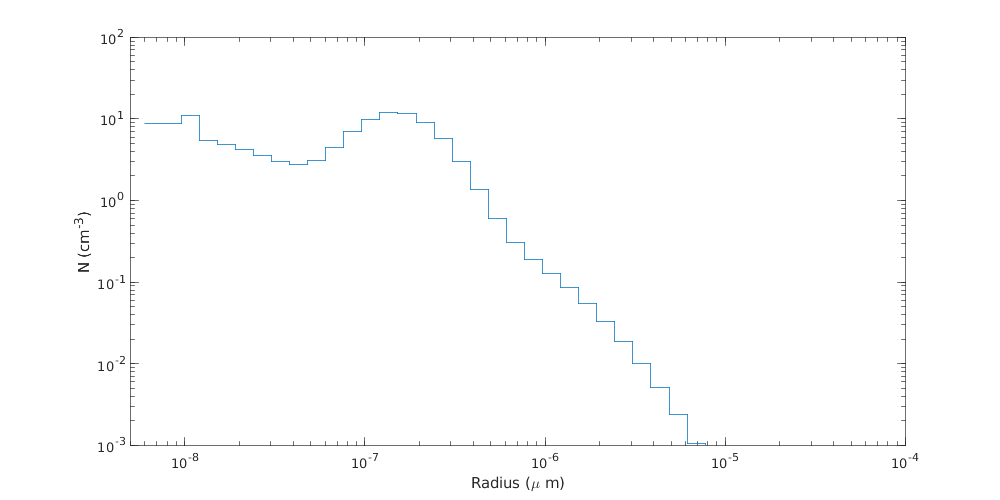

In [41]:
rad=[0.60000000E-08    0.95244063E-08    0.12000000E-07    0.15119053E-07    0.19048813E-07    0.24000000E-07    0.30238105E-07    0.38097625E-07    0.48000000E-07    0.60476210E-07    0.76195250E-07    0.96000000E-07    0.12095242E-06    0.15239050E-06    0.19200000E-06    0.24190484E-06    0.30478100E-06    0.38400000E-06    0.48380968E-06    0.60956200E-06    0.76800000E-06    0.96761937E-06    0.12191240E-05    0.15360000E-05    0.19352387E-05    0.24382480E-05    0.30720000E-05    0.38704775E-05    0.48764960E-05    0.61440000E-05    0.77409549E-05    0.97529921E-05    0.12288000E-04    0.15481910E-04    0.19505984E-04    0.24576000E-04    0.30963820E-04    0.39011968E-04    0.49152000E-04]
dsd=[0.87541941E+01    0.10904401E+02    0.54912661E+01    0.48467048E+01    0.41831006E+01    0.35452294E+01    0.30104371E+01    0.27498311E+01    0.30956245E+01    0.44675454E+01    0.69823403E+01    0.99324662E+01    0.11843517E+02    0.11495058E+02    0.90085699E+01    0.57194743E+01    0.29948478E+01    0.13601214E+01    0.60150983E+00    0.30540634E+00    0.18821945E+00    0.12727817E+00    0.85575907E-01    0.54916002E-01    0.33242973E-01    0.18926214E-01    0.10125874E-01    0.50897501E-02    0.24035862E-02    0.10666547E-02    0.44504673E-03    0.17473474E-03    0.64647615E-04    0.22588733E-04    0.74803241E-05    0.23605414E-05    0.71577605E-06    0.21108403E-06    0.61518362E-07]
stairs(rad,dsd)
set(gca,'YScale','log','XScale','log')
ylim([1e-3 1e2])
xlim([5e-9 1e-4])
xlabel('Radius (\mu m)')
ylabel('N (cm^{-3})')


In [9]:
exp(sig)'


ans =

    4.5394    1.6218    2.4889

